In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv(r"C:\Users\Datas\Cars\car_sales_data.csv")
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [9]:
df.describe()

,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


In [27]:
#Neue Spallte erzeigen 

In [5]:
CURRENT_YEAR = 2026
df["car_age"] = CURRENT_YEAR - df["Year of manufacture"]

df["price_per_km"] = df["Price"] / df["Mileage"]

df["mileage_per_year"] = df["Mileage"] / df["car_age"]

In [41]:
df["car_age"].head()

0    24
1    10
2    12
3    38
4    20
Name: car_age, dtype: int64

In [ ]:
#Engine Size kategorisieren:

In [7]:
df["engine_size_category"] = pd.cut(
    df["Engine size"],
    bins=[0, 2, 3, 6],
    labels=["Small", "Medium", "Large"]
)


In [ ]:
# Exploratory Data Analysis (EDA) 

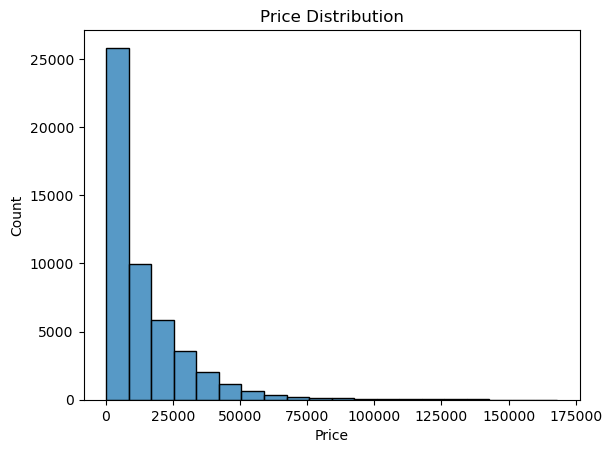

In [54]:
plt.figure()
sns.histplot(df["Price"], bins=20)
plt.title("Price Distribution")
plt.show()


In [70]:
#Preis vs. Mileage

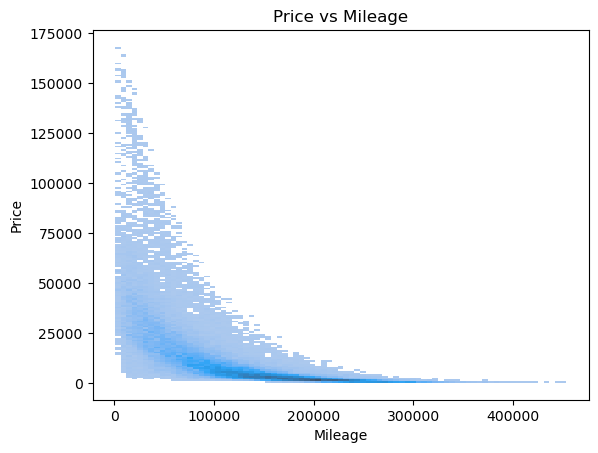

In [76]:
plt.figure()
sns.histplot(data=df, x="Mileage", y="Price")
plt.title("Price vs Mileage")
plt.show()


In [78]:
#Durchschnittspreis nach Fuel Type

In [82]:
df.groupby("Fuel type")["Price"].mean().sort_values(ascending=False)


Fuel type
Hybrid    14949.288154
Petrol    13690.617742
Diesel    13145.078158
Name: Price, dtype: float64

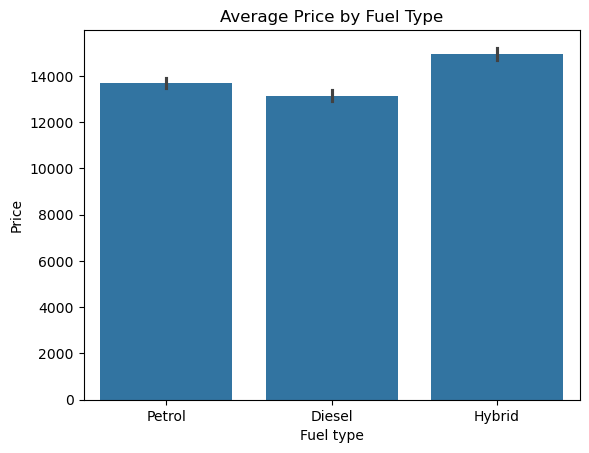

In [84]:
plt.figure()
sns.barplot(x="Fuel type", y="Price", data=df)
plt.title("Average Price by Fuel Type")
plt.show()


In [ ]:
#Einfluss quantifizieren (Kernfrage!)

In [90]:
df[["Price", "Mileage", "car_age", "Engine size"]].corr()


,Price,Mileage,car_age,Engine size
Price,1.000000,-0.632692,-0.714209,0.398371
Mileage,-0.632692,1.000000,0.807458,0.004470
car_age,-0.714209,0.807458,1.000000,0.000675
Engine size,0.398371,0.004470,0.000675,1.000000


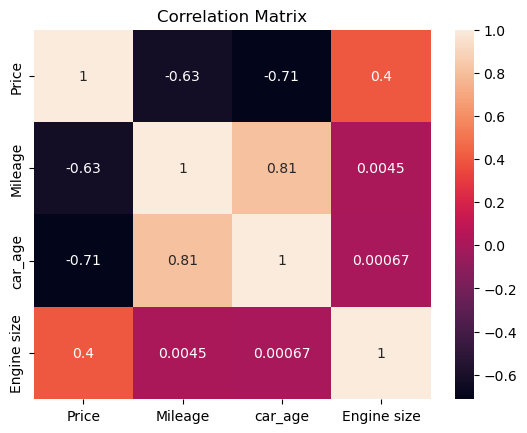

In [94]:
plt.figure()
sns.heatmap(df[["Price", "Mileage", "car_age", "Engine size"]].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# regression 

In [107]:
import statsmodels.api as sm

X = df[["Mileage", "car_age", "Engine size"]]
X = sm.add_constant(X)  # für Intercept
y = df["Price"]

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                 3.520e+04
Date:                Wed, 28 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:35:12   Log-Likelihood:            -5.2786e+05
No. Observations:               50000   AIC:                         1.056e+06
Df Residuals:                   49996   BIC:                         1.056e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         2.38e+04    144.934    164.191      

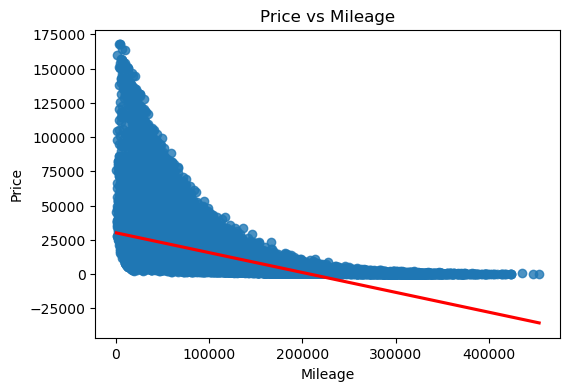

In [111]:
plt.figure(figsize=(6,4))
sns.regplot(x="Mileage", y="Price", data=df, line_kws={"color":"red"})
plt.title("Price vs Mileage")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

In [9]:
# wir brauchen ID für die Visualisierung 
df["ID"] = range(1, len(df) + 1)


In [ ]:
#Preisvorhersage (ML)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[["Mileage", "car_age", "Engine size"]]
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

model.coef_


array([-3.80135764e-02, -9.87317147e+02,  8.93197878e+03])

In [17]:
df.to_csv("car_sales_data_Visual.csv", index=False)